In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [40]:
stats = pd.read_csv('Masters_Stats0.csv')

In [41]:
stats.head()

,Player,Driving_Rank,Average_Drive_Distance,Year,Percent_Fairway_Hit,Percent_Greens_Hit,Top_10's,Percent_BreakPar_Rank,Avg_Score_Rank,Money_Rank,Percent_Par3_Bird,Percent_Par4_Bird,Percent_Par5_Bird,Avg_scoreB4cut,Masters_Top_10,Masters_Top_25
0,Fuzzy Zoeller,1.0,267.4,1980,63.10,62.81,4.0,32.0,38.0,29.0,12.14,12.31,41.53,71.5,0.0,1.0
1,Barney Thompson,2.0,267.1,1980,56.75,59.26,NaN,141.0,130.0,124.0,5.56,7.61,33.82,72.7,NaN,NaN
2,J.C. Snead,3.0,266.9,1980,59.13,63.27,1.0,124.0,28.0,42.0,5.56,12.20,28.15,71.1,0.0,1.0
3,Buddy Gardner,4.0,266.8,1980,56.56,62.91,NaN,50.0,88.0,84.0,13.70,10.51,38.46,72.2,NaN,NaN
4,Jack Nicklaus,5.0,265.9,1980,70.36,70.83,1.0,26.0,9.0,26.0,13.75,17.16,25.00,71.4,0.0,0.0


In [42]:
stats.shape

(11325, 16)

# Transform DF

In [43]:
stats.isnull().sum()

Player                       0
Driving_Rank              3172
Average_Drive_Distance    3172
Year                         0
Percent_Fairway_Hit       3172
Percent_Greens_Hit        3172
Top_10's                  7201
Percent_BreakPar_Rank     3172
Avg_Score_Rank            3171
Money_Rank                1027
Percent_Par3_Bird         3172
Percent_Par4_Bird         3172
Percent_Par5_Bird         3172
Avg_scoreB4cut            3171
Masters_Top_10            7791
Masters_Top_25            7791
dtype: int64

In [44]:
stats2 = stats[np.isfinite(stats['Masters_Top_10'])]

In [45]:
stats2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 11324
Data columns (total 16 columns):
Player                    3534 non-null object
Driving_Rank              2315 non-null float64
Average_Drive_Distance    2315 non-null float64
Year                      3534 non-null int64
Percent_Fairway_Hit       2315 non-null float64
Percent_Greens_Hit        2315 non-null float64
Top_10's                  1914 non-null float64
Percent_BreakPar_Rank     2315 non-null float64
Avg_Score_Rank            2315 non-null float64
Money_Rank                2619 non-null float64
Percent_Par3_Bird         2315 non-null float64
Percent_Par4_Bird         2315 non-null float64
Percent_Par5_Bird         2315 non-null float64
Avg_scoreB4cut            2315 non-null float64
Masters_Top_10            3534 non-null float64
Masters_Top_25            3534 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 469.4+ KB


In [46]:
stats2.isnull().sum()

Player                       0
Driving_Rank              1219
Average_Drive_Distance    1219
Year                         0
Percent_Fairway_Hit       1219
Percent_Greens_Hit        1219
Top_10's                  1620
Percent_BreakPar_Rank     1219
Avg_Score_Rank            1219
Money_Rank                 915
Percent_Par3_Bird         1219
Percent_Par4_Bird         1219
Percent_Par5_Bird         1219
Avg_scoreB4cut            1219
Masters_Top_10               0
Masters_Top_25               0
dtype: int64

In [47]:
money_median = stats2['Money_Rank'].median()
money_median

50.0

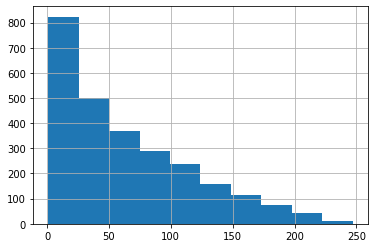

In [48]:
stats2['Money_Rank'].hist()

In [49]:
#Skewed - median represents typical Rank

In [50]:
stats2['Money_Rank'].fillna(money_median, inplace = True) 

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
stats2.isnull().sum()

Player                       0
Driving_Rank              1219
Average_Drive_Distance    1219
Year                         0
Percent_Fairway_Hit       1219
Percent_Greens_Hit        1219
Top_10's                  1620
Percent_BreakPar_Rank     1219
Avg_Score_Rank            1219
Money_Rank                   0
Percent_Par3_Bird         1219
Percent_Par4_Bird         1219
Percent_Par5_Bird         1219
Avg_scoreB4cut            1219
Masters_Top_10               0
Masters_Top_25               0
dtype: int64

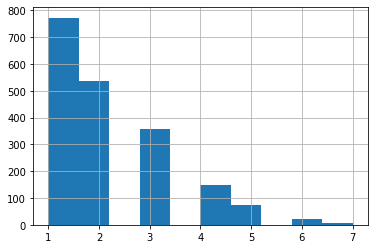

In [52]:
stats2["Top_10's"].hist()

In [53]:
#missing 0 value - meaning those players had not made the top10. Will fill with 0

In [54]:
stats2["Top_10's"].fillna(0, inplace = True) 

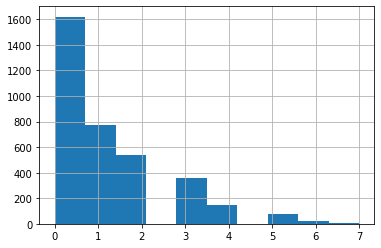

In [55]:
stats2["Top_10's"].hist()

In [56]:
stats2.isnull().sum()

Player                       0
Driving_Rank              1219
Average_Drive_Distance    1219
Year                         0
Percent_Fairway_Hit       1219
Percent_Greens_Hit        1219
Top_10's                     0
Percent_BreakPar_Rank     1219
Avg_Score_Rank            1219
Money_Rank                   0
Percent_Par3_Bird         1219
Percent_Par4_Bird         1219
Percent_Par5_Bird         1219
Avg_scoreB4cut            1219
Masters_Top_10               0
Masters_Top_25               0
dtype: int64

In [57]:
stat3 = stats2.dropna()

In [58]:
stat3.isnull().sum()

Player                    0
Driving_Rank              0
Average_Drive_Distance    0
Year                      0
Percent_Fairway_Hit       0
Percent_Greens_Hit        0
Top_10's                  0
Percent_BreakPar_Rank     0
Avg_Score_Rank            0
Money_Rank                0
Percent_Par3_Bird         0
Percent_Par4_Bird         0
Percent_Par5_Bird         0
Avg_scoreB4cut            0
Masters_Top_10            0
Masters_Top_25            0
dtype: int64

In [59]:
stat3.reset_index(drop=True, inplace = True)

In [22]:
# stat3.to_csv('Masters_Stats1.csv', index = False)

# Distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16da6550>,
      dtype=object)

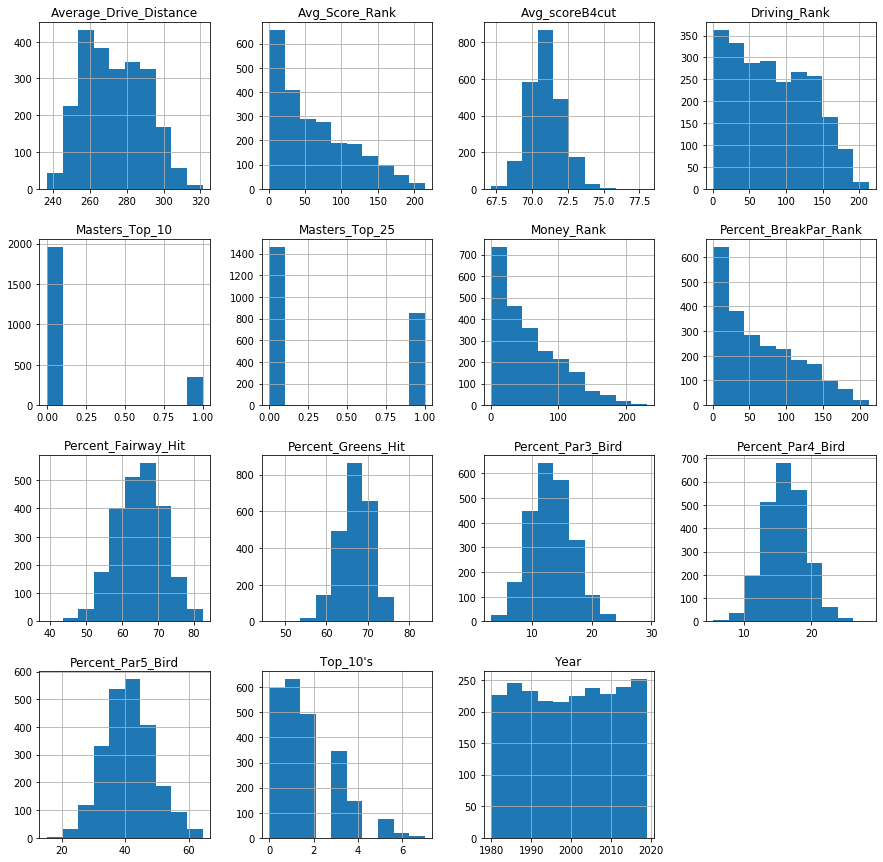

In [23]:
stat3.hist(figsize = [15,15])

# Log Transform Skewed

In [24]:
stat3['Avg_Score_Ranklog'] = np.log(stat3['Avg_Score_Rank']) #more distributed
stat3['Money_Ranklog'] = np.log(stat3['Money_Rank']) #more distributed
stat3['Percent_BreakPar_Ranklog'] = np.log(stat3['Percent_BreakPar_Rank']) #more distributed

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1796bc90>,
      dtype=object)

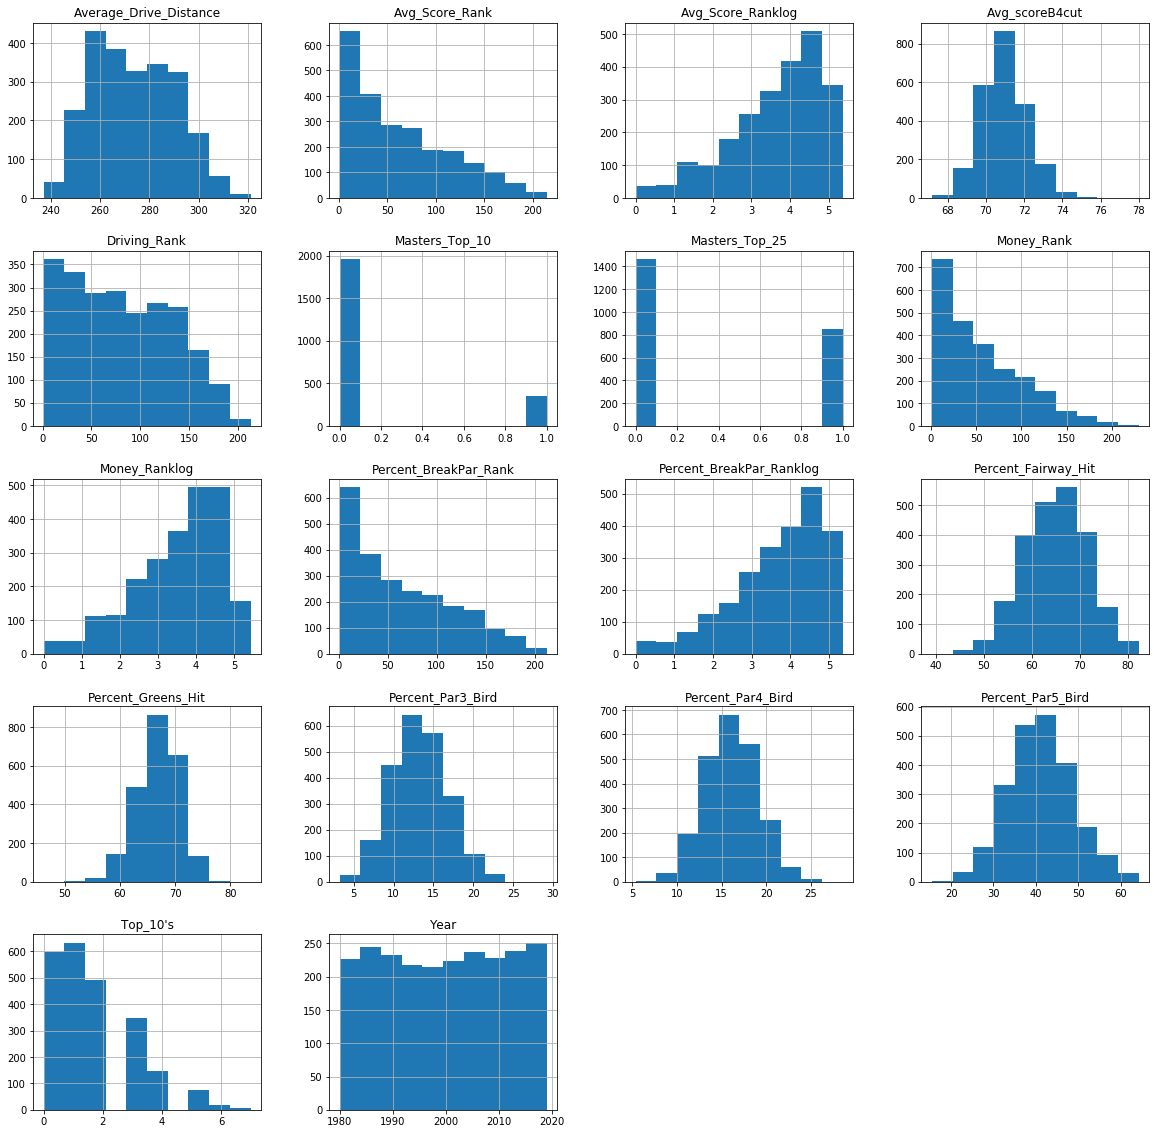

In [25]:
stat3.hist(figsize = [20,20])

In [92]:
stat = stat3["Money_Rank"]
t25 = stat3['Masters_Top_10']

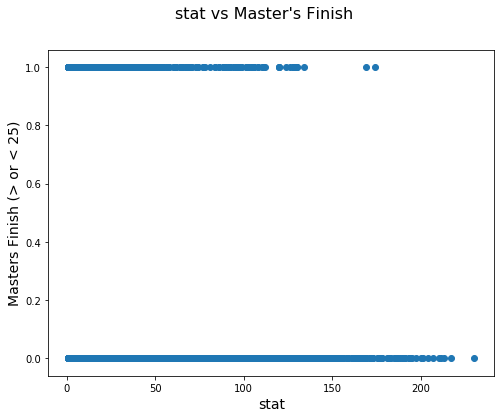

In [91]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle("stat vs Master's Finish", fontsize=16)
plt.scatter(stat, t25)
plt.xlabel('stat', fontsize=14)
plt.ylabel('Masters Finish (> or < 25)', fontsize=14)
plt.show()

# StandardScaler 

In [26]:
numeric_features = ['Driving_Rank',"Top_10's",'Percent_BreakPar_Ranklog','Avg_Score_Ranklog','Money_Ranklog','Average_Drive_Distance','Percent_Fairway_Hit','Percent_Greens_Hit','Percent_Par3_Bird','Percent_Par4_Bird','Percent_Par5_Bird','Avg_scoreB4cut']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

x_scaled_masters = pd.DataFrame(numeric_transformer.fit_transform(stat3[numeric_features]),columns = numeric_features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a199787d0>,
      dtype=object)

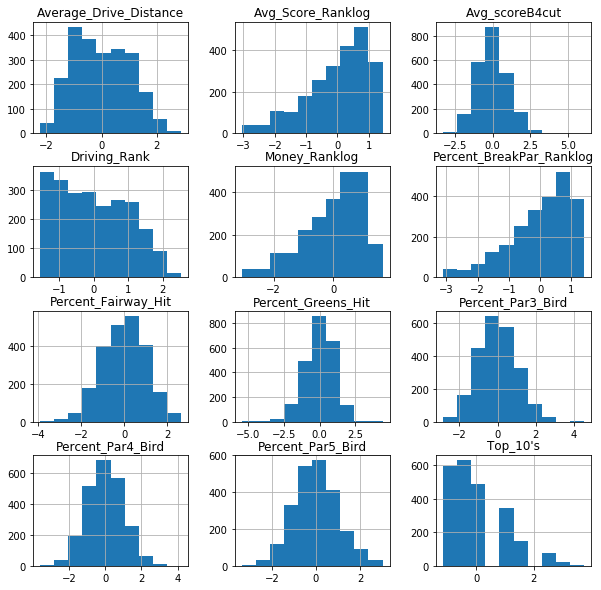

In [27]:
x_scaled_masters.hist(figsize =[10,10])

# Combining Top25s (Dependent) and scaled stats (Independent)

In [29]:
t25 = stat3[['Player','Year','Masters_Top_25']]

In [32]:
top25 = DF = pd.concat([t25, x_scaled_masters], axis = 1)

In [33]:
top25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 15 columns):
Player                      2315 non-null object
Year                        2315 non-null int64
Masters_Top_25              2315 non-null float64
Driving_Rank                2315 non-null float64
Top_10's                    2315 non-null float64
Percent_BreakPar_Ranklog    2315 non-null float64
Avg_Score_Ranklog           2315 non-null float64
Money_Ranklog               2315 non-null float64
Average_Drive_Distance      2315 non-null float64
Percent_Fairway_Hit         2315 non-null float64
Percent_Greens_Hit          2315 non-null float64
Percent_Par3_Bird           2315 non-null float64
Percent_Par4_Bird           2315 non-null float64
Percent_Par5_Bird           2315 non-null float64
Avg_scoreB4cut              2315 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 271.4+ KB


In [34]:
top25.isnull().sum()

Player                      0
Year                        0
Masters_Top_25              0
Driving_Rank                0
Top_10's                    0
Percent_BreakPar_Ranklog    0
Avg_Score_Ranklog           0
Money_Ranklog               0
Average_Drive_Distance      0
Percent_Fairway_Hit         0
Percent_Greens_Hit          0
Percent_Par3_Bird           0
Percent_Par4_Bird           0
Percent_Par5_Bird           0
Avg_scoreB4cut              0
dtype: int64

In [37]:
top25.head()

,Player,Year,Masters_Top_25,Driving_Rank,Top_10's,Percent_BreakPar_Ranklog,Avg_Score_Ranklog,Money_Ranklog,Average_Drive_Distance,Percent_Fairway_Hit,Percent_Greens_Hit,Percent_Par3_Bird,Percent_Par4_Bird,Percent_Par5_Bird,Avg_scoreB4cut
0,Fuzzy Zoeller,1980,1.0,-1.557936,1.645844,-0.186929,-0.006273,-0.147066,-0.380798,-0.284456,-1.083591,-0.322482,-1.276666,0.040460,0.456467
1,J.C. Snead,1980,1.0,-1.519314,-0.440755,0.954553,-0.262595,0.174396,-0.411081,-0.886184,-0.962889,-2.193174,-1.313608,-1.709933,0.110460
2,Jack Nicklaus,1980,0.0,-1.480691,-0.440755,-0.361907,-1.215239,-0.241844,-0.471647,0.815933,1.020815,0.135241,0.352141,-2.122021,0.369965
3,Andy Bean,1980,1.0,-1.442069,0.950311,-3.107519,-1.555566,-1.672780,-0.495874,0.256644,-0.152089,0.692468,0.335349,0.330884,-0.261496
4,John Fought,1980,0.0,-1.403446,-0.440755,0.042231,0.780302,0.689139,-0.580666,-0.678535,-1.185924,-0.544236,-1.031505,-0.486751,1.537736


In [38]:
top25.to_csv('Masters_StatsT25.csv', index = False)